In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import math

In [2]:
beta = np.arange(0.01, 0.1, 0.005)
print(beta)

[0.01  0.015 0.02  0.025 0.03  0.035 0.04  0.045 0.05  0.055 0.06  0.065
 0.07  0.075 0.08  0.085 0.09  0.095]


In [26]:
DFs = []
d = []
for b in beta:
    b = "%.2f" %b
    df = pd.read_csv(f'{os.getcwd()}/IEEE802.11p-model-main/{b}.csv')
    DFs.append(df)
    if b == '0.06':
        d.append(df)
    

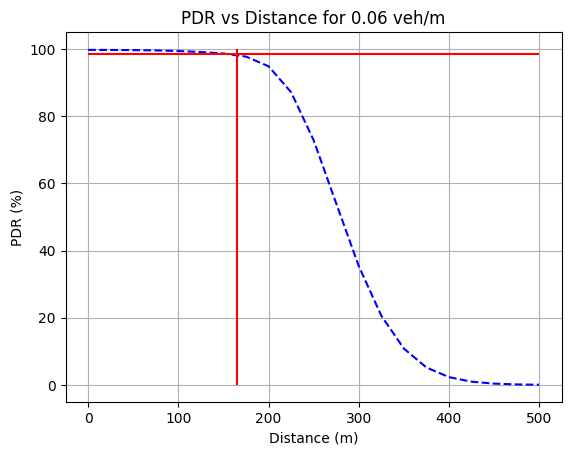

In [45]:
x = d[0]['distance']
y = d[0]['PDR']*100

fig,ax = plt.subplots()
ax.plot(x,y, 'b--')
    
ax.set_xlabel('Distance (m)')
ax.set_ylabel('PDR (%)')
ax.set_title('PDR vs Distance for 0.06 veh/m')
ax.hlines(y=98.5, xmin=0, xmax=500, colors = 'r')
ax.vlines(x=165, ymin = 0, ymax = 100, colors = 'r')
plt.grid(True)
plt.ion()

In [31]:
Coverage = {}
for i,df in enumerate(DFs):
    res_df = df[df['PDR']>0.985]
    coverage = res_df['distance'].mean()
    if math.isnan(coverage):
        coverage = 0
    beta[i] = "%.2f" %beta[i]
    Coverage[beta[i]] = coverage

print(Coverage)

{0.01: 75.0, 0.02: 50.0, 0.03: 37.5, 0.04: 37.5, 0.05: 25.0, 0.06: 12.5, 0.07: 0, 0.08: 0, 0.09: 0}


[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
[75.0, 50.0, 37.5, 37.5, 25.0, 12.5, 0, 0, 0]


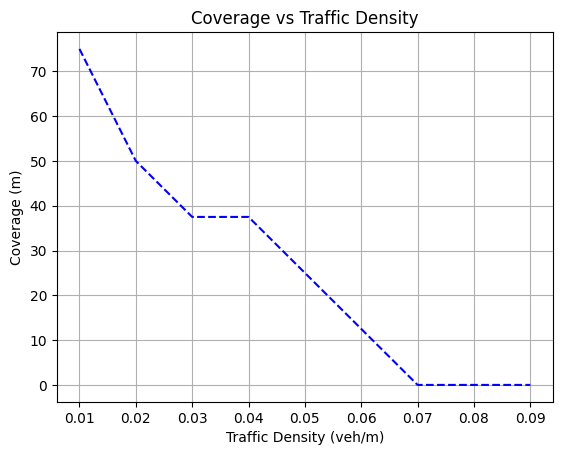

In [14]:
fig, ax = plt.subplots()
x = []
y = []
for item in Coverage.items():
    x.append(item[0])
    y.append(item[1])

print (x)
print(y)
ax.plot(x,y, 'b--')
    
ax.set_xlabel('Traffic Density (veh/m)')
ax.set_ylabel('Coverage (m)')
ax.set_title('Coverage vs Traffic Density')
plt.grid(True)
